## Licenciatura en Ciencia de Datos

### 03 Spectral Clustering

In [1]:
# Importar Librerías

import pandas as pd
import numpy as np
import networkx as nx
import scipy as sp

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Definir el grafo

In [3]:
G_karate = nx.karate_club_graph()

Obtener el número de nodos y relaciones

In [4]:
print(G_karate.number_of_nodes())
print(G_karate.number_of_edges())

34
78


Visualizar el grafo

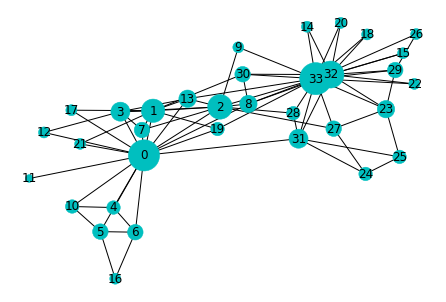

In [8]:
degree = nx.degree_centrality(G_karate)
size = [x * 2000 for x in degree.values()]

nx.draw(G_karate,node_color='c',edge_color='k', with_labels=True, node_size = size)

Matriz de adjacencia

In [10]:
A = nx.linalg.adjacency_matrix(G_karate)
A.toarray()

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

Matriz laplaciana

In [13]:
L = nx.linalg.laplacian_matrix(G_karate)
L.toarray()

array([[16, -1, -1, ..., -1,  0,  0],
       [-1,  9, -1, ...,  0,  0,  0],
       [-1, -1, 10, ...,  0, -1,  0],
       ...,
       [-1,  0,  0, ...,  6, -1, -1],
       [ 0,  0, -1, ..., -1, 12, -1],
       [ 0,  0,  0, ..., -1, -1, 17]], dtype=int64)

**Calcular eigenvalores y eigenvectores**

In [41]:
#help(sp.sparse.linalg.eigsh)

In [25]:
eigenvalores, eigenvectores = sp.sparse.linalg.eigsh(L.astype(np.float64), which = "SM")

In [26]:
eigenvalores

array([1.61318678e-15, 4.68525227e-01, 9.09247664e-01, 1.12501072e+00,
       1.25940411e+00, 1.59928308e+00])

In [19]:
eigenvectores.shape

(34, 6)

In [27]:
# El primer eigenvector
print(eigenvectores[:, 0])

[-0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859
 -0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859
 -0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859
 -0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859
 -0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859 -0.17149859
 -0.17149859 -0.17149859 -0.17149859 -0.17149859]


In [28]:
# El segundo eigenvector
print(eigenvectores[:, 1])

[ 0.11213743  0.04128789 -0.02321896  0.05549978  0.28460453  0.32372722
  0.32372722  0.052586   -0.05160128 -0.09280089  0.28460453  0.21099295
  0.1094613   0.01474197 -0.16275078 -0.16275078  0.42276533  0.10018142
 -0.16275078  0.01363713 -0.16275078  0.10018142 -0.16275078 -0.15569457
 -0.15302558 -0.16096292 -0.18710956 -0.12766405 -0.0951523  -0.16765031
 -0.07349964 -0.09875343 -0.13034546 -0.11890326]


In [ ]:
extraer el segundo eigenvector

In [30]:
e2 = eigenvectores[:, 1]

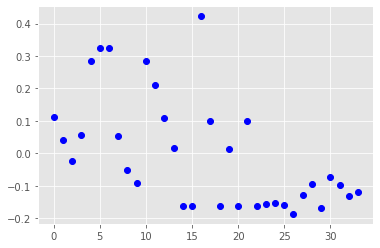

In [38]:
plt.plot(e2,'bo')
          
plt.show()

Graficar agregando el color por comunidad. Notaque se se asigna color con el umbral de mayor a cero o menor a cero

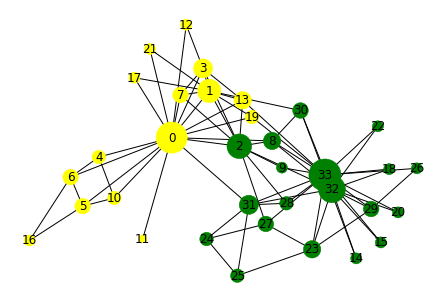

In [29]:
# Asignar color a las comunidades

color_nombre = ['yellow' if i > 0 else 'green' for i in e2]

#Graficar
nx.draw(G_karate,node_color=color_nombre,edge_color='k', with_labels=True, node_size = size)

Clasificación real. 

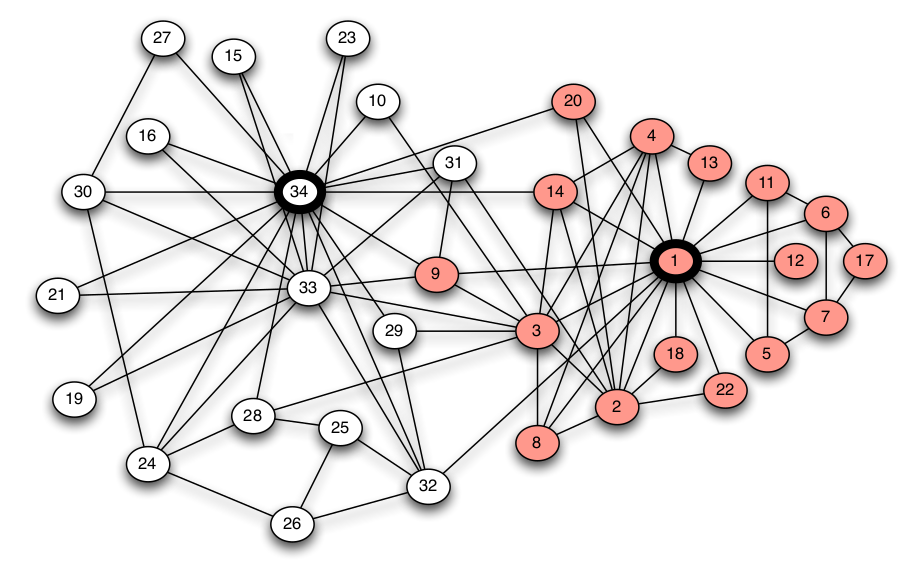

Notar que los índices en python inician en cero, por tanto el nodo cero de la red del ejemplo corresponde al nodo uno de la red mostrada previamente.